# Lista 4
#### Zuzanna Sosnowska

In [29]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.optimize import root_scalar
import numpy as np

### Zadanie 1

In [30]:
def bisection_method(function,x1,x2,tol=1.0e-9):
    operations = 0
    f1 = function(x1)
    f2 = function(x2)
    if f1 == 0.0: 
        return x1
    if f2 == 0.0: 
        return x2
    if np.sign(f1) == np.sign(f2):
        raise ValueError('Wrong x1 and x2')
    # Obliczanie liczby iteracji potrzebnych do uzyskania odpowiedniej dokładności
    n = int(np.ceil(np.log(abs(x2 - x1) / tol) / np.log(2.0)))
    operations += 3
    for i in range(n):
        x3 = 0.5 * (x1 + x2)
        operations += 2
        f3 = function(x3)
        if (np.abs(f3) > np.abs(f1)) and (np.abs(f3) > np.abs(f2)):
            return None
        if f3 == 0.0: 
            return x3
        if np.sign(f2)!= np.sign(f3): 
            x1 = x3
            f1 = f3
        else: 
            x2 = x3
            f2 = f3
    return (x1 + x2) / 2.0, n, operations


def brent_method(function, x1, x2, tol=1.0e-9, max_iter=2000):
    """
    Metoda Brenta do znajdowania pierwiastków funkcji f na przedziale [a, b].
    :param function: Funkcja, której pierwiastek szukamy
    :param x1: Początek przedziału
    :param x2: Koniec przedziału
    :param tol: Dokładność rozwiązania
    :param max_iter: Maksymalna liczba iteracji
    :return: Przybliżony pierwiastek
    """
    operations = 0
    if np.sign(function(x1)) == np.sign(function(x2)):
        raise ValueError("Funkcja nie zmienia znaku na podanym przedziale.")

    fx1 = function(x1)
    fx2 = function(x2)
    if abs(fx1) < abs(fx2):
        x1, x2 = x2, x1
        fx1, fx2 = fx2, fx1

    c = x1; fc = fx1
    # s = x2; fs = fx2
    d = e = x2 - x1

    counter = 0

    for iteration in range(max_iter):
        if fx2 != fc and fx1 != fc:
            s = (x1 * fx2 * fc / ((fx1 - fx2) * (fx1 - fc)) +
                 x2 * fx1 * fc / ((fx2 - fx1) * (fx2 - fc)) +
                 c * fx1 * fx2 / ((fc - fx1) * (fc - fx2)))
            operations += 20
        else:
            s = x2 - fx2 * (x2 - x1) / (fx2 - fx1)
            operations += 5
        
        operations += 6
        if not ((3 * x1 + x2) / 4 < s < x2 or (x2 < s < (3 * x1 + x2) / 4)):
            s = (x1 + x2) / 2
            operations += 2
        operations += 1
        if abs(s - x2) < tol:
            return s, counter, operations

        fs = function(s)
        d, e = e, d
        
        operations += 1
        if fs * fx2 < 0:
            x1 = x2
            fx1 = fx2
        else:
            fx1 /= 2
            operations += 1

        x2 = s
        fx2 = fs

        if abs(fx2) < tol:
            return x2, counter, operations
        counter += 1
    raise RuntimeError("Metoda Brenta nie zbiega w zadanej liczbie iteracji.")


def secant_method(function, x1, x2, tol=1.0e-9, max_iter=2000):
    operations = 0
    for i in range(max_iter):
        f_x1 = function(x1)
        f_x2 = function(x2)
        if f_x2 - f_x1 == 0:
            raise ZeroDivisionError("Function values at x0 and x1 resulted in division by zero.")
        x_new = x2 - (f_x2 * (x2 - x1)) / (f_x2 - f_x1)
        operations += 5
        x1, x2 = x2, x_new
        if np.abs(function(x_new)) < tol:
            return float(x_new), i, operations
    raise ValueError("Secant method did not converge within the maximum number of iterations.")


def newton_method(function, derivative, x, tol=1.0e-9):
    operations = 0
    if function(x) == 0:
        return x, 0
    counter = 0
    while np.abs(function(x)) > tol:
        x = x - function(x) / derivative(x)
        operations += 2
        counter += 1
    return x, counter, operations

In [31]:
def f(x): return np.tan(np.pi - x) - x
def df(x): return - 1 / np.power(np.cos(np.pi - x), 2) - 1


x0 = 2.0
bracket_values = [2, 2.5]
accuracy = 1.0e-9

def generate_table(function, derivative, x, bracket, tolerance):
    bisection = bisection_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    brent = brent_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    secant = secant_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    newton = newton_method(function=function, derivative=derivative, x=x, tol=tolerance)
    
    headers = ["Metody:", "Bisekcja", "M. Brenta", "M. Siecznych", "M. Newtona"]
    data = [
        ["x",                       bisection[0],      brent[0],       secant[0],      newton[0]],
        ["f(x)",                    function(bisection[0]),   function(brent[0]),    function(secant[0]),   function(newton[0])],
        ["liczba iteracji",         bisection[1],      brent[1],       secant[1],      newton[1]],
        ["liczba mnożeń i dodawań", bisection[2],      brent[2],       secant[2],      newton[2]],
    ]
    
    # Tworzenie tabeli
    print(tabulate(data, headers=headers, tablefmt="grid"))
    
    
    sp_bisection = root_scalar(f=function, bracket=bracket, method="bisect", xtol=tolerance)
    sp_brent = root_scalar(f=function, bracket=bracket, method="brentq", xtol=tolerance)
    sp_secant = root_scalar(f=function, x0=bracket[0], x1=bracket[1] , method="secant", rtol=tolerance)
    sp_newton = root_scalar(f=function, x0=x, fprime=derivative, method="newton", xtol=tolerance)
    
    sp_data = [
        ["x",                       sp_bisection.root,          sp_brent.root,          sp_secant.root,          sp_newton.root],
        ["f(x)",                    function(sp_bisection.root),function(sp_brent.root),function(sp_secant.root),function(sp_newton.root)],
        ["liczba iteracji",         sp_bisection.iterations,    sp_brent.iterations,    sp_secant.iterations,    sp_newton.iterations],
    ]
    
    print(tabulate(sp_data, headers=headers, tablefmt="grid"))
    

generate_table(function=f, derivative=df, x=x0, bracket=bracket_values, tolerance=accuracy)

+-------------------------+--------------+---------------+----------------+--------------+
| Metody:                 |     Bisekcja |     M. Brenta |   M. Siecznych |   M. Newtona |
+=========================+==============+===============+================+==============+
| x                       |  2.02876     |   2.02876     |     2.02876    |  2.02876     |
+-------------------------+--------------+---------------+----------------+--------------+
| f(x)                    |  2.67672e-10 |   3.45448e-11 |    -4.2899e-13 |  1.30064e-10 |
+-------------------------+--------------+---------------+----------------+--------------+
| liczba iteracji         | 29           |   4           |     5          |  3           |
+-------------------------+--------------+---------------+----------------+--------------+
| liczba mnożeń i dodawań | 61           | 126           |    30          |  6           |
+-------------------------+--------------+---------------+----------------+--------------+

### Zadanie 2

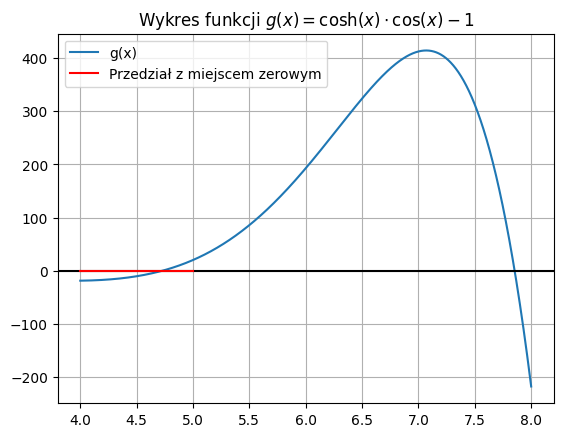

+-------------------------+--------------+---------------+----------------+--------------+
| Metody:                 |     Bisekcja |     M. Brenta |   M. Siecznych |   M. Newtona |
+=========================+==============+===============+================+==============+
| x                       |  4.73004     |   4.73004     |    4.73004     |  10.9956     |
+-------------------------+--------------+---------------+----------------+--------------+
| f(x)                    | -2.59413e-08 |  -3.18988e-10 |   -3.18102e-11 |   1.1634e-11 |
+-------------------------+--------------+---------------+----------------+--------------+
| liczba iteracji         | 30           |   6           |    6           |   7          |
+-------------------------+--------------+---------------+----------------+--------------+
| liczba mnożeń i dodawań | 63           | 184           |   35           |  14          |
+-------------------------+--------------+---------------+----------------+--------------+

In [32]:
def cosh(x): return (np.exp(x) + np.exp(-x)) / 2


def sinh(x): return (np.exp(x) - np.exp(-x)) / 2


def g(x): return cosh(x) * np.cos(x) - 1


def dg(x): return sinh(x) * np.cos(x) - cosh(x) * np.sin(x)


x0 = 4.0
bracket_values = [4.0, 5.0]

x_values = np.linspace(x0, 8, 10000)
y_values = g(x_values)

plt.plot(x_values, y_values, label='g(x)')
plt.axhline(y=0, color='black')
plt.plot((4.0, 5.0), (0.0, 0.0), color='red', label="Przedział z miejscem zerowym")
plt.title(r"Wykres funkcji $g(x) = \cosh(x)\cdot\cos(x) - 1$")
plt.grid(True)
plt.legend()
plt.show()


generate_table(function=g, derivative=dg, x=x0, bracket=bracket_values, tolerance=accuracy)

### Zadanie 3

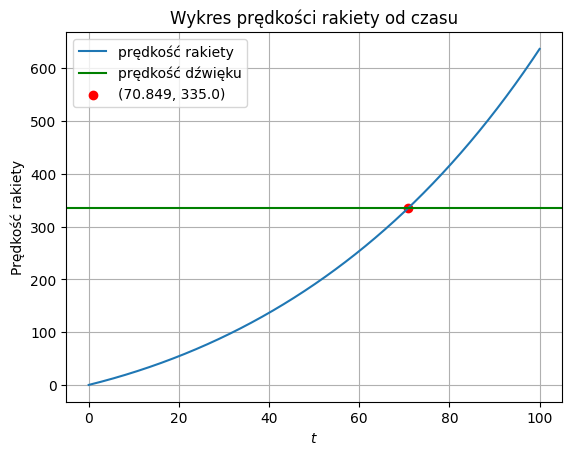

+-------------------------+--------------+-------------+----------------+--------------+
| Metody:                 |     Bisekcja |   M. Brenta |   M. Siecznych |   M. Newtona |
+=========================+==============+=============+================+==============+
| x                       | 70.8489      |     70.8489 |   70.8489      | 70.8489      |
+-------------------------+--------------+-------------+----------------+--------------+
| f(x)                    |  1.78341e-09 |      0      |   -1.13687e-13 | -1.13687e-13 |
+-------------------------+--------------+-------------+----------------+--------------+
| liczba iteracji         | 37           |      8      |    6           |  7           |
+-------------------------+--------------+-------------+----------------+--------------+
| liczba mnożeń i dodawań | 77           |    238      |   35           | 14           |
+-------------------------+--------------+-------------+----------------+--------------+
+-----------------+--

In [33]:
from scipy.constants import g


def h(t):
    u = 2510
    M0 = 2.8 * 10 ** 6
    m = 13.3 * 10 ** 3
    return u * np.log(M0 / (M0 - m * t)) - g * t


def dh(t):
    u = 2510
    M0 = 2.8 * 10 ** 6
    m = 13.3 * 10 ** 3
    return u * m / (M0 - m * t) - g


v = 335
t_list = np.linspace(0, 100, 10000)
sol_brent = brent_method(lambda x: h(x) - v, 0, 100)[0]

x0 = 0
bracket_values = [0, 100]


plt.plot(t_list, h(t_list), label='prędkość rakiety')
plt.axhline(y=v, color='green', label='prędkość dźwięku')
plt.scatter(sol_brent, h(sol_brent), color='red', label=f'({np.round(sol_brent, decimals=3)}, {h(sol_brent)})')
plt.xlabel(r'$t$')
plt.ylabel('Prędkość rakiety')
plt.title('Wykres prędkości rakiety od czasu')
plt.grid(True)
plt.legend()
plt.show()

generate_table(function=lambda x: h(x) - v, derivative=dh, x=x0, bracket=bracket_values, tolerance=accuracy)

### Zadanie 4

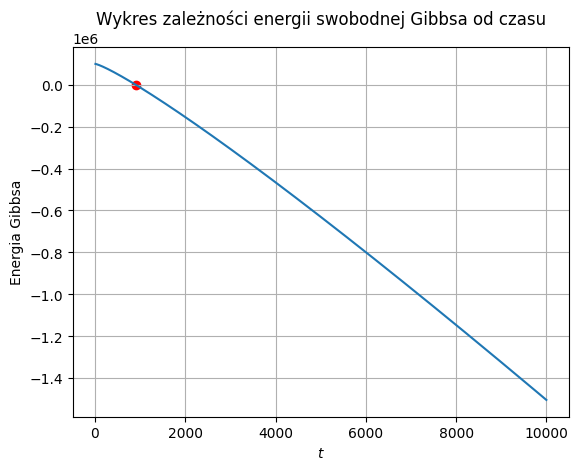

In [34]:
from scipy.constants import R


def gibbs_free_energy(T): return -R * T * 2.5 * np.log(T / T0) + 1e5


T0 = 4.44418
G = -1e5
acc = 1.0e-9

x0 = 900
bracket_values = [10, 10000]

t_list = np.linspace(10, 10000, 100000)
values = gibbs_free_energy(t_list)
solution = brent_method(gibbs_free_energy, 10, 10000)[0]

plt.plot(t_list, values)
plt.scatter(solution, gibbs_free_energy(solution), color="red")
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel('Energia Gibbsa')
plt.title("Wykres zależności energii swobodnej Gibbsa od czasu")
plt.show()


def create_table_for_ex4(function, bracket, tolerance):
    bisection = bisection_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    brent = brent_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    secant = secant_method(function=function, x1=bracket[0], x2=bracket[1], tol=tolerance)
    
    headers = ["Metody:", "Bisekcja", "M. Brenta", "M. Siecznych"]
    data = [
        ["x",                       bisection[0],      brent[0],       secant[0]],
        ["f(x)",                    function(bisection[0]),   function(brent[0]),    function(secant[0])],
        ["liczba iteracji",         bisection[1],      brent[1],       secant[1]],
        ["liczba mnożeń i dodawań", bisection[2],      brent[2],       secant[2]],
    ]
    
    # Tworzenie tabeli
    print(tabulate(data, headers=headers, tablefmt="grid"))
    
    
    sp_bisection = root_scalar(f=function, bracket=bracket, method="bisect", xtol=tolerance)
    sp_brent = root_scalar(f=function, bracket=bracket, method="brentq", xtol=tolerance)
    sp_secant = root_scalar(f=function, x0=bracket[0], x1=bracket[1] , method="secant", rtol=tolerance)
    
    sp_data = [
        ["x",                       sp_bisection.root,          sp_brent.root,          sp_secant.root],
        ["f(x)",                    function(sp_bisection.root),function(sp_brent.root),function(sp_secant.root)],
        ["liczba iteracji",         sp_bisection.iterations,    sp_brent.iterations,    sp_secant.iterations],
    ]
    
    print(tabulate(sp_data, headers=headers, tablefmt="grid"))
    
create_table_for_ex4(function=gibbs_free_energy, bracket=bracket_values, tolerance=acc)

### Zadanie 5

In [40]:
def norm(x): return np.sqrt(np.sum(x**2))

def newton_modified_method(f_func, f_der, g_func, g_der, x, tol=1.0e-9):
    if f_func(*x) == 0 and g_func(*x) == 0:
        return x
    x_new = x
    while True:
        x_new = x_new - np.linalg.inv(np.array([f_der(*x_new), g_der(*x_new)])) @ np.array([f_func(*x_new), g_func(*x_new)])
        if norm(np.array([f_func(*x_new), g_func(*x_new)])) <= tol:
            break
    return x_new

def p(x, y): return np.tan(x) - y - 1

def dp(x, y): return [1 / np.power(np.cos(x), 2), -1]

def q(x, y): return np.cos(x) - 3 * np.sin(y)

def dq(x, y): return [-np.sin(x), -3 * np.cos(y)]

sol = newton_modified_method(f_func=p, f_der=dp, g_func=q, g_der=dq, x=np.zeros(2))

print("Rozwiązania nieliniowego układu równań:", sol)
print("tan(x) - y =", p(*sol)+1)
print("cos(x) - 3sin(y) = ", q(*sol))

Rozwiązania nieliniowego układu równań: [0.88159259 0.21359471]
tan(x) - y = 1.000000000000009
cos(x) - 3sin(y) =  -8.881784197001252e-16


### Zadanie 6

Pierwiastki wielomianu w(x):
(-1.0229828662226999e-16+2j)
(2-8.813080999578745e-18j)
-3j
(-7+0j)


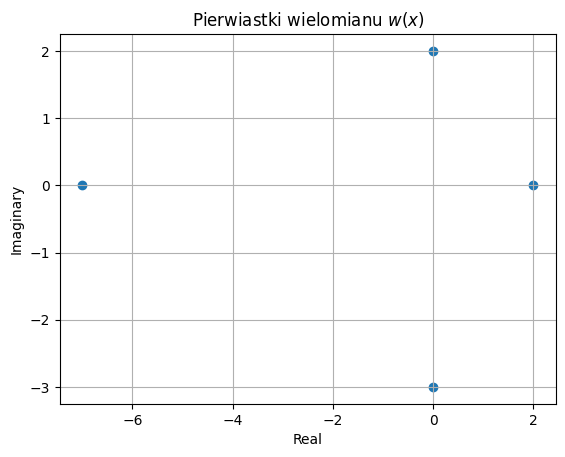

In [42]:
import cmath


def laguerre_method(coeffs, x, tol=1e-12, max_iter=100):
    """
    Funkcja oblicza pierwiastek wielomianu metodą Laguerre'a
    :param coeffs: Lista współczynników wielomianu w kolejności od współczynnika przy najwyższej
    potędze do współczynnika przy najniższej potędze
    :param x: Wartość początkowa ciągu przybliżeń
    :param tol: Tolerowany błąd
    :param max_iter: Maksymalna liczba iteracji
    :return: Pierwiastek zespolony wielomianu
    """

    n = len(coeffs) - 1  # Stopień wielomianu

    def poly_eval(coef, x_new):
        p_p = coef[0]
        dp_p = 0
        ddp_p = 0
        for c in coef[1:]:
            ddp_p = ddp_p * x_new + 2 * dp_p
            dp_p = dp_p * x_new + p_p
            p_p = p_p * x_new + c
        return p_p, dp_p, ddp_p

    for _ in range(max_iter):
        poly, dpoly, ddpoly = poly_eval(coef=coeffs, x_new=x)
        if abs(poly) < tol:
            return x

        g_p = dpoly / poly
        h_p = g_p * g_p - ddpoly / poly
        denom1 = g_p + cmath.sqrt((n - 1) * (n * h_p - g_p * g_p))
        denom2 = g_p - cmath.sqrt((n - 1) * (n * h_p - g_p * g_p))
        denom = denom1 if abs(denom1) > abs(denom2) else denom2
        x = x - n / denom

    raise ValueError("Laguerre's method did not converge within the maximum number of iterations.")


def find_all_roots(coeffs, tol=1e-12, max_iter=100):
    """
    Funkcja oblicza wszystkie pierwiastki wielomianu o zadanych współczynnikach metodą Laguerre'a.
    :param coeffs: Współczynniki wielomianu w kolejności od współczynnika przy najwyższej potędze.
    :param tol: Dopuszczalny błąd numeryczny.
    :param max_iter: Maksymalna liczba iteracji
    :return: Funkcja zwraca listę pierwiastków zadanego wielomianu.
    """
    roots = []
    coeffs = coeffs[:]  # Tworzenie kopii współczynników
    while len(coeffs) > 1:
        # Wybór początkowy pierwiastka wielomianu
        x = 0 + 0j
        root = laguerre_method(coeffs, x, tol, max_iter)
        roots.append(root)

        # Wielomian po zredukowaniu go o pierwiastek
        deflated_coeffs = []
        poly = 0
        for c in coeffs:
            deflated_coeffs.append(poly)
            poly = poly * root + c
        deflated_coeffs.pop(0)  # Usuwanie zera na początku
        # Uaktualnianie wielomianu
        coeffs = deflated_coeffs

    return roots


coefficients = [1, (5 + 1j), -(8 - 5j), (30 - 14j), -84]

root_lst = find_all_roots(coefficients)
print("Pierwiastki wielomianu w(x):")
for r in root_lst:
    print(r)
    
x_lst = [ele.real for ele in root_lst] 
y_lst = [ele.imag for ele in root_lst] 
  
plt.scatter(x_lst, y_lst) 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.title(r"Pierwiastki wielomianu $w(x)$")
plt.grid(True)
plt.show() 

Na przedstawionym poniżej wykresie pokazane zostały pierwiastki wielomianu obliczone przy użyciu programu WolframAlpha. Jak możemy zauważyć, pierwiastki pokrywają się ze sobą, co dowodzi poprawności zaimplementowanej metody.

<img src="plot1.PNG" alt="Wykres przedstawiający pierwiastki wielomianu obliczone przy użyciu programu Wolfram" width="600">